# CW2 - Coding Part 2 (30 points)
# Variational Autoencoders
Build a Convolutional Variational AutoEncoder and achieve best possible reconstruction and latent space disentanglement. Then answer the questions.

In [ ]:
import os
import numpy as np
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor
from torchvision.utils import make_grid
from torchsummary import summary

import matplotlib.pyplot as plt
import pandas as pd
import altair as alt

In [ ]:
# Use GPU if available
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

In [ ]:
def show(img):
    npimg = img.cpu().numpy()
    plt.imshow(np.transpose(npimg, (1,2,0)))

In [ ]:
# Load the data

#######################################################################
#                       ** START OF YOUR CODE **
#######################################################################

#                 ** MODIFY CODE HERE IF NECESSARY **

batch_size = 100

data_transforms = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

def denormalize(x):
    return x

#######################################################################
#                       ** END OF YOUR CODE **
#######################################################################

training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=data_transforms,
)

train_dataloader = torch.utils.data.DataLoader(
    training_data,
    batch_size=batch_size,
    shuffle=True,
)

# Download test data
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=data_transforms,
)

test_dataloader = torch.utils.data.DataLoader(
    test_data,
    batch_size=batch_size,
)

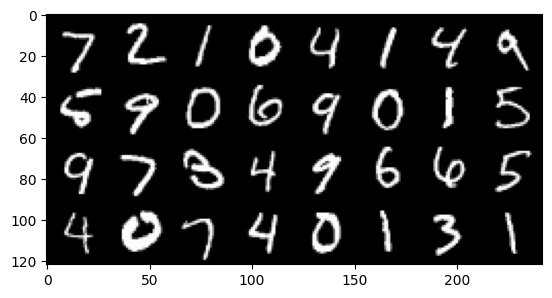

In [ ]:
sample_inputs, _ = next(iter(test_dataloader))
fixed_input = sample_inputs[0:32, :, :, :]
# visualize the original images of the last batch of the test set
img = make_grid(denormalize(fixed_input), nrow=8, padding=2, normalize=False,
                scale_each=False, pad_value=0)
plt.figure()
show(img)

# Variational Auto Encoders (VAEs)

<figure>
  <img src="https://blog.bayeslabs.co/assets/img/vae-gaussian.png" style="width:60%">
  <figcaption>
    Fig.1 - VAE Diagram (with a Guassian prior), taken from <a href="https://blog.bayeslabs.co/2019/06/04/All-you-need-to-know-about-Vae.html">2</a>.
  </figcaption>
</figure>

## Build a convolutional VAE (5 points)

The only requirement is that it contains convolutions both in the encoder and decoder. You can still use some linear layers if needed.

In [ ]:
# Convolutional VAE implementation here
class VAE(nn.Module):
    def __init__(self, latent_dim):
        super(VAE, self).__init__()
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        pass

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

    def encode(self, x):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        pass

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

    def reparametrize(self, mu, logvar):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        pass

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

    def decode(self, z):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        pass

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

    def forward(self, x):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################

        pass

        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################


#######################################################################
#                       ** START OF YOUR CODE **
#######################################################################

# latent_dim = ?

#######################################################################
#                       ** END OF YOUR CODE **
#######################################################################

model = VAE(latent_dim).to(device)
summary(model, (1, 28, 28))

Briefly Explain your architectural choices

<font color='red'>***YOUR ANSWER***</font>

## Defining a Loss (6 points)

The Beta VAE loss, with encoder $q$ and decoder $p$:
$$ L=\mathbb{E}_{q_\phi(z \mid X)}[\log p_\theta(X \mid z)]-\beta D_{K L}[q_\phi(z \mid X) \| p_\theta(z)]$$

The loss you implement depends on your choice of latent prior and model outputs.

There exist different solutions that are equally correct. Depending on your assumptions you might want to do a data preprocessing step.



In [ ]:
def loss_function_VAE(recon_x, x, mu, logvar, beta):
        #######################################################################
        #                       ** START OF YOUR CODE **
        #######################################################################



        #######################################################################
        #                       ** END OF YOUR CODE **
        #######################################################################

Briefly answer the following:

a.   Explain what are the possible choices of reconstruction loss, and which one you choose. Explain how it relates to

1.   Your choice of VAE prior
2.   The output data domain
3.   The latent space disentanglement

Feel free to try and train with different reconstruction losses to see which one works best

<font color='red'>***YOUR ANSWER***</font>

a.

1.   
2.   
3.   



## Train and plot

Train the VAE and plot:

1.   The total loss curves for train and test (on the same plot)
2.   The reconstruction losses for train and test (on the same plot)
3.   The KL losses for train and test (on the same plot)

(x-axis: epochs, y-axis: loss)

You may want to have different plots with differente values of $\beta$.

Hint: You can modify the training scripts provided in previous tutorials to record the required information, and use matplotlib to plot them
Hint: If you plan on doing hyperparameter tuning, it might be a good idea to split the training set and create a validation set

In [ ]:
# Training code

#######################################################################
#                       ** START OF YOUR CODE **
#######################################################################



#######################################################################
#                       ** END OF YOUR CODE **
#######################################################################

In [ ]:
# Plotting code

#######################################################################
#                       ** START OF YOUR CODE **
#######################################################################



#######################################################################
#                       ** END OF YOUR CODE **
#######################################################################

## Plot loss (3 points)

Analyze and discuss:

1.   Loss curves (reconstruction and KL divergence)
2.   Explain how different values of $\beta$ affect your training.

<font color='red'>***YOUR ANSWER***</font>

1.   
2.




## Sample and reconstruction quality (6 points)
Simply run the below cell to show the output

In [ ]:
# Input images
model.eval()
sample_inputs, _ = next(iter(test_dataloader))
fixed_input = sample_inputs[0:32, :, :, :]

# visualize the original images of the last batch of the test set
img = make_grid(denormalize(fixed_input), nrow=8, padding=2, normalize=False,
                scale_each=False, pad_value=0)
plt.figure()
show(img)

# Reconstructed images
with torch.no_grad():

    _, _, recon_batch = model(sample_inputs.to(device))
    recon_batch = recon_batch.unsqueeze(1).reshape(-1,1,28,28)
    recon_batch = recon_batch[0:32, :, :, :]
    recon_batch = recon_batch.cpu()
    recon_batch = make_grid(denormalize(recon_batch), nrow=8, padding=2, normalize=False,
                            scale_each=False, pad_value=0)
    plt.figure()
    show(recon_batch)

# Generated Images
n_samples = 256
z = torch.randn(n_samples,latent_dim).to(device)
with torch.no_grad():

    samples = model.decode(z)
    samples = samples.unsqueeze(1).reshape(-1,1,28,28)
    samples = samples.cpu()
    samples = make_grid(denormalize(samples), nrow=16, padding=2, normalize=False,
                            scale_each=False, pad_value=0)
    plt.figure(figsize = (8,8))
    show(samples)

## Reconstruction and generated samples discussion (5 points)
Analyze and briefly discuss:

1.   Reconstruction quality
2.   Generated samples quality

Explain in your answers how they relate to different values of $\beta$, latent dimension and VAE architecture

<font color='red'>***YOUR ANSWER***</font>

1.   
2.   

## T-SNE on Embeddings (5 points)
Extract the latent representations of the test set and visualize them using [T-SNE](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)

Run the below cells (no coding required).

Qualitatively assess the learned representations of your model using the T-SNE plots.


In [ ]:
alt.data_transformers.disable_max_rows()

def plot_tsne(tsne_xy, dataloader, num_points=1000):

    images, labels = zip(*[(x[0].numpy()[0,:,:,None], x[1]) for x in dataloader.dataset])

    num_points = min(num_points, len(labels))
    data = pd.DataFrame({'x':tsne_xy[:, 0], 'y':tsne_xy[:, 1], 'label':labels,
                        'image': images})
    data = data.sample(n=num_points, replace=False)

    alt.renderers.set_embed_options('light')
    selection = alt.selection_single(on='mouseover', clear='false', nearest=True,
                                    init={'x':data['x'][data.index[0]], 'y':data['y'][data.index[0]]})
    scatter = alt.Chart(data).mark_circle().encode(
        alt.X('x:N',axis=None),
        alt.Y('y:N',axis=None),
        color=alt.condition(selection,
                            alt.value('lightgray'),
                            alt.Color('label:N')),
        size=alt.value(100),
        tooltip='label:N'
    ).add_selection(
        selection
    ).properties(
        width=400,
        height=400
    )

    digit  = alt.Chart(data).transform_filter(
        selection
    ).transform_window(
        index='count()'           # number each of the images
    ).transform_flatten(
        ['image']                 # extract rows from each image
    ).transform_window(
        row='count()',            # number the rows...
        groupby=['index']         # ...within each image
    ).transform_flatten(
        ['image']                 # extract the values from each row
    ).transform_window(
        column='count()',         # number the columns...
        groupby=['index', 'row']  # ...within each row & image
    ).mark_rect(stroke='black',strokeWidth=0).encode(
        alt.X('column:O', axis=None),
        alt.Y('row:O', axis=None),
        alt.Color('image:Q',sort='descending',
            scale=alt.Scale(scheme=alt.SchemeParams('lightgreyteal',
                            extent=[1, 0]),

            ),
            legend=None
        ),
    ).properties(
        width=400,
        height=400,
    )

    return scatter | digit

In [ ]:
# TSNE
from sklearn.manifold import TSNE

for t, (x, y) in enumerate(test_dataloader):
    if t == 0:
        data = x
        labels = y
    else:
        data = torch.cat((data, x))
        labels = torch.cat((labels, y))

# Then let's apply dimensionality reduction with the trained encoder

with torch.no_grad():
    data = data.to(device)
    mu, logvar = model.encode(data)
    z = (model.reparametrize(mu, logvar)).cpu().detach().numpy()

z_embedded = TSNE(n_components=2).fit_transform(z)

In [ ]:
plot_tsne(z_embedded, test_dataloader, num_points=1000)

### Discussion
Analyze and discuss the visualized T-SNE representations

1. What role do the KL loss term and $\beta$ have?
2. Can you find any outliers?

<font color='red'>***YOUR ANSWER***</font>

1.   
2.   